In [18]:
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [19]:
conn = sqlite3.connect("db.sqlite")
cursor = conn.cursor()

In [20]:
# retrieving customers table
customers_df = pd.read_sql_query("SELECT customer_id, first_name, last_name, state, start_date FROM customers", conn)
# customers_df = customers_df.set_index(["start_date"])
print(customers_df.head(10))

    customer_id first_name last_name state  start_date
0  C84725947570  Elizabeth     Jones    PR  2022-01-01
1  C97761921457     Taylor   Bennett    NE  2022-01-01
2  C85509443959     Amanda  Crawford  None  2022-01-01
3  C77919217553    Melissa  Martinez    NE  2022-01-01
4  C94654194089      Stacy   Sanders  None  2022-01-01
5  C42516599860   Veronica     Adams    SD  2022-01-01
6  C90146722938      Jacob  Marshall    GA  2022-01-01
7  C75042977482     Amanda     Scott  None  2022-01-01
8  C54655184087   Benjamin     Cross    WV  2022-01-01
9  C15760142472   Michelle     Brown    CT  2022-01-01


In [21]:
# retrieving transactions table
transactions_df = pd.read_sql_query(
    "SELECT date, transaction_id, customer_id, department, category, sku, price, discount FROM transactions", 
    conn
    )

transactions_df.tail()

,date,transaction_id,customer_id,department,category,sku,price,discount
655600,2023-10-30,591710384747,C48092459954,Women,Tops,Hoodie,40.77,NaN
655601,2023-10-30,591710384747,C48092459954,Women,Tops,Tunic,29.77,NaN
655602,2023-10-30,217838665002,C70827631504,Women,Bottoms,Culottes,35.77,NaN
655603,2023-10-30,217838665002,C70827631504,Women,Bottoms,Culottes,35.77,NaN
655604,2023-10-30,596168046147,C87041346000,Men,Bottoms,Jeans,28.77,NaN


In [22]:
conn.close()

In [23]:
# Get the daily customers frequency
customers_df["start_date"] = pd.to_datetime(customers_df["start_date"]).dt.strftime('%Y/%m/%d')
customers_df["month"] = pd.to_datetime(customers_df["start_date"]).dt.strftime("%m")
customers_df1 = customers_df.groupby("start_date")
print(customers_df1.size())

start_date
2022/01/01    254
2022/01/02    241
2022/01/03    251
2022/01/04    210
2022/01/05    221
             ... 
2023/10/26    205
2023/10/27    197
2023/10/28    232
2023/10/29    214
2023/10/30    290
Length: 668, dtype: int64


In [25]:
# process transactions table
transactions_df["date"] = pd.to_datetime(transactions_df["date"]).dt.strftime('%Y/%m/%d')
transactions_df["month"] = pd.to_datetime(transactions_df["date"]).dt.strftime("%m")
# fill null discount column
transactions_df["discount"] = transactions_df["discount"].fillna(0)
# add revenue column
transactions_df["revenue"] = transactions_df["price"] - transactions_df["discount"]
transactions_df.tail()

,date,transaction_id,customer_id,department,category,sku,price,discount,month,revenue
655600,2023/10/30,591710384747,C48092459954,Women,Tops,Hoodie,40.77,0.0,10,40.77
655601,2023/10/30,591710384747,C48092459954,Women,Tops,Tunic,29.77,0.0,10,29.77
655602,2023/10/30,217838665002,C70827631504,Women,Bottoms,Culottes,35.77,0.0,10,35.77
655603,2023/10/30,217838665002,C70827631504,Women,Bottoms,Culottes,35.77,0.0,10,35.77
655604,2023/10/30,596168046147,C87041346000,Men,Bottoms,Jeans,28.77,0.0,10,28.77


In [26]:
transactions_df.shape

(655605, 10)

In [29]:
past_transactions = transactions_df[transactions_df["date"] <= "2023/11/22"]
past_transactions.shape

(655105, 10)

In [30]:
future_transactions = transactions_df[transactions_df["date"] > "2023/11/22"]
future_transactions.tail()

,date,transaction_id,customer_id,department,category,sku,price,discount,month,revenue
654966,2024/12/01,74185730550,C97288685819,Men,Shirts,Crew Neck Shirt,22.77,0.0,12,22.77
655010,2026/04/23,450492858598,C87098628772,Women,Tops,Blouse,18.77,0.0,04,18.77
655090,2025/08/10,864586279890,C26421882147,Men,Bottoms,Corduroy Pants,38.77,0.0,08,38.77
655321,2026/04/11,436885001936,C97686118432,Men,Bottoms,Jeans,28.77,0.0,04,28.77
655488,2026/05/08,485143804486,C82856234840,Women,Tops,Tunic,29.77,0.0,05,29.77


In [49]:
transactions_daily_df = pd.DataFrame(past_transactions[["date", "revenue"]].groupby("date", as_index=True).sum())
transactions_daily_df.tail()

,revenue
date,
2023/11/09,80.31
2023/11/12,51.54
2023/11/13,34.77
2023/11/14,35.77
2023/11/18,34.77


In [39]:
transactions_monthly_df = pd.DataFrame(past_transactions[["month", "revenue"]].groupby("month", as_index=True).sum())
transactions_monthly_df.head()

,revenue
month,
01,2247516.62
02,2051258.76
03,2149753.63
04,1801659.25
05,1865438.33


In [50]:
# save monthly revenue for visuals
os.makedirs("./visuals", exist_ok=True)
past_transactions.to_csv("./visuals/past_transactions.csv")
future_transactions.to_csv("./visuals/future_transactions.csv")
transactions_daily_df.to_csv("./visuals/daily_transactions.csv")
transactions_monthly_df.to_csv("./visuals/monthly_transactions.csv")

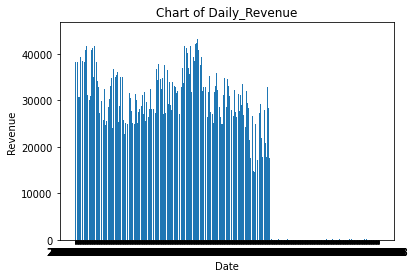

In [ ]:
# Create a bar chart
plt.bar(transactions_daily_df["date"], transactions_daily_df["revenue"])
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Chart of Daily_Revenue')
plt.show()

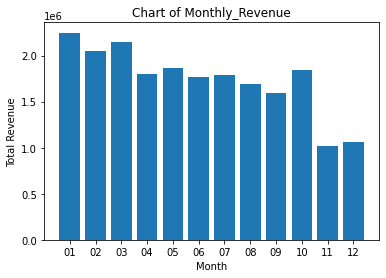

In [42]:
# Create a bar chart
plt.bar(transactions_monthly_df.index, transactions_monthly_df["revenue"])
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Chart of Monthly_Revenue')
plt.show()